## Visualization Notebook for RQ2
This notebook contains visualization of the results generated by RQ2.py
Specifically, it generates Figure 4 that compares the syntactic alignment between $\alpha$ and $||\alpha f(x)||$

In [ ]:
import numpy as np

np.random.seed(0)
import seaborn as sns

sns.set()
import pickle
import os
from matplotlib.ticker import FuncFormatter

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
sns.set_style(style='white')

In [100]:
def to_filename(s, extension):
    return "".join(x if (x.isalnum() or x in "._-") else '_' for x in s) + "." + extension


def create_figure(feature_name, weighted_sum, weight_total, min_total, filetype):
    assert filetype in ('png', 'pdf')

    mean_by_head = weighted_sum / weight_total
    exclude_mask = np.array(weight_total) < min_total

    masked_mean_by_head = np.ma.masked_array(mean_by_head, mask=exclude_mask)
    layer_max = masked_mean_by_head.max(-1)

    n_layers, n_heads = mean_by_head.shape
    if n_layers == 12 and n_heads == 12:
        plt.figure(figsize=(6, 4.4))
        ax1 = plt.subplot2grid((100, 85), (0, 0), colspan=65, rowspan=99)  # Heatmap
        ax2 = plt.subplot2grid((100, 85), (12, 70), colspan=15, rowspan=75)  # Barchart
    elif n_layers == 30 and n_heads == 16:
        plt.figure(figsize=(3, 2.2))
        ax1 = plt.subplot2grid((100, 85), (0, 5), colspan=55, rowspan=96)
        ax2 = plt.subplot2grid((100, 85), (0, 62), colspan=17, rowspan=97)
    elif n_layers == 12 and n_heads == 64:
        plt.figure(figsize=(8.5, 2.2))
        ax1 = plt.subplot2grid((100, 160), (0, 5), colspan=135, rowspan=96)
        ax2 = plt.subplot2grid((100, 160), (22, 144), colspan=10, rowspan=53)
        plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.01, hspace=0.01)
    else:
        raise NotImplementedError

    xtick_labels = [str(i) if i % 2 == 0 else '' for i in range(1, n_heads + 1)]
    ytick_labels = [str(i) if i % 2 == 0 else '' for i in range(1, n_layers + 1)]
    heatmap = sns.heatmap((mean_by_head * 100).tolist(), center=0.0, ax=ax1,
                          square=True, cbar=False,
                          cmap=LinearSegmentedColormap.from_list('rg', ["#F14100", "white", "tab:blue"], N=256),
                          mask=exclude_mask,
                          xticklabels=xtick_labels,
                          yticklabels=ytick_labels,
                         vmin=0, vmax=100)
    plt.setp(heatmap.get_yticklabels(), fontsize=10)
    plt.setp(heatmap.get_xticklabels(), fontsize=10)
    heatmap.tick_params(axis='x', pad=1, length=2)
    heatmap.tick_params(axis='y', pad=.5, length=2)
    heatmap.yaxis.labelpad = 3
    heatmap.invert_yaxis()
    heatmap.set_facecolor('#E7E6E6')
    # split axes of heatmap to put colorbar
    ax_divider = make_axes_locatable(ax1)
    if n_layers == 12 and n_heads == 12:
        cax = ax_divider.append_axes('left', size='7%', pad='15%')
    elif n_layers == 30 and n_heads == 16:
        cax = ax_divider.append_axes('left', size='7%', pad='45%')
    elif n_layers == 12 and n_heads == 64:
        cax = ax_divider.append_axes('left', size='1.5%', pad='7%')
    else:
        raise NotImplementedError
    # # make colorbar for heatmap.
    # # Heatmap returns an axes obj but you need to get a mappable obj (get_children)
    cbar = plt.colorbar(ax1.get_children()[0], cax=cax, orientation='vertical', format='%.0f%%')
    cax.yaxis.set_ticks_position('left')
    #cbar.solids.set_edgecolor("face")
    cbar.ax.tick_params(labelsize=10, length=4, pad=2)
    ax1.set_xlabel('Head', size=10)
    ax1.set_ylabel('Layer', size=10)
    for _, spine in ax1.spines.items():
        spine.set_visible(True)
    ax2.set_title('Max', size=9)
    #bp = sns.barplot(x=layer_max * 100, ax=ax2, y=list(range(layer_max.shape[0])), lw=.8,color="tab:blue", orient="h", edgecolor="black")
    bp = sns.barplot(x=layer_max * 100, ax=ax2, y=list(range(layer_max.shape[0])), lw=.8,color="tab:blue", orient="h")
    bp.bar_label(bp.containers[0], fmt='%.1f', fontsize=10, padding=10)
    formatter = FuncFormatter(lambda y, pos: '0' if (y == 0) else "%d%%" % (y))
    ax2.xaxis.set_major_formatter(formatter)
    ax2.set(xlim=(0, 100))
    plt.setp(bp.get_xticklabels(), fontsize=10)
    bp.tick_params(axis='x', pad=1, length=3)
    ax2.invert_yaxis()
    ax2.set_yticklabels([])
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.xaxis.set_ticks_position('bottom')
    ax2.axvline(0, linewidth=.8, color='black')
    return bp, heatmap

In [101]:
exp_name_alpha='edge_features_contact_mean_codebert_python_noneighbor'
exp_name_afx='edge_features_contact_afx_mean_codebert_python_noneighbor'

In [102]:
path = os.path.join("./", "results", f'{exp_name_alpha}.pickle')
path_afx = os.path.join("./", "results", f'{exp_name_afx}.pickle')

In [103]:
feature_to_weighted_sum, weight_total = pickle.load(open(path, "rb"))

In [104]:
feature_to_weighted_sum_afx, weight_total_afx = pickle.load(open(path_afx, "rb"))

In [105]:
min_total = 1
filetype = 'pdf'

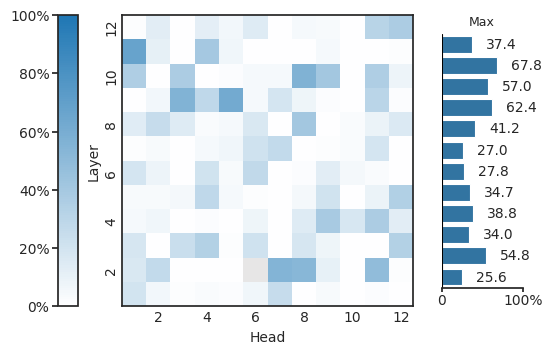

In [106]:
for feature_name, weighted_sum in feature_to_weighted_sum.items():
    bp, hmap = create_figure(feature_name, weighted_sum, weight_total, min_total=min_total, filetype=filetype)
    #plt.savefig("ast_agreement_alpha.svg")

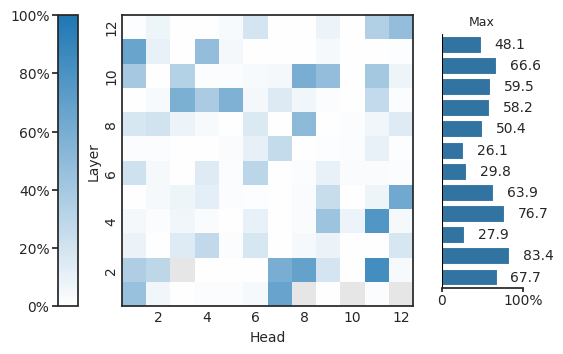

In [107]:
for feature_name_afx, weighted_sum_afx in feature_to_weighted_sum_afx.items():
    create_figure(feature_name_afx, weighted_sum_afx, weight_total_afx, min_total=min_total, filetype=filetype)
    #plt.savefig("ast_agreement_afx.svg")